# 01. Import Libraries

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Import Data

In [4]:
# Import ".json" file for the World Countries 

world_geo = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis/02 Data/Original Data/world-countries.json'

In [5]:
world_geo

'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis/02 Data/Original Data/world-countries.json'

In [6]:
# View JSON file contents
f = open(r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis/02 Data/Original Data/world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [7]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis'

In [8]:
# Import Merged Clean Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_weight.pkl'))

In [9]:
# Import Additional Info Dataframe
df_additional = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_additional_final.pkl'))

In [10]:
df.head()

R_fighter      B_fighter       Referee_x      date_x  \
0     Adrian Yanez  Gustavo Lopez   Chris Tognoni  2021-03-20   
1     Trevin Giles  Roman Dolidze       Herb Dean  2021-03-20   
2    Marion Reneau  Macy Chiasson      Mark Smith  2021-03-20   
3  Leonardo Santos   Grant Dawson   Chris Tognoni  2021-03-20   
4       Song Kenan    Max Griffin  Keith Peterson  2021-03-20   

                 location Winner_x  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA      Red       False       Bantamweight  0.000000   
1  Las Vegas, Nevada, USA      Red       False       Middleweight  0.500000   
2  Las Vegas, Nevada, USA     Blue       False  WomenBantamweight  0.125000   
3  Las Vegas, Nevada, USA     Blue       False        Lightweight  0.000000   
4  Las Vegas, Nevada, USA     Blue       False       Welterweight  0.046875   

   B_avg_opp_KD  ...         Format       Referee_y  date_y  Year       City  \
0         0.000  ...  3 Rnd (5-5-5)   Chris Tognoni  20-Mar  2021  Las Vegas   
1         0.000  ...  3 Rnd (5-5-5)       Herb Dean  20-Mar  2021  Las Vegas   
2         0.000  ...  3 Rnd (5-5-5)      Mark Smith  20-Mar  2021  Las Vegas   
3         0.000  ...  3 Rnd (5-5-5)   Chris Tognoni  20-Mar  2021  Las Vegas   
4         0.125  ...  3 Rnd (5-5-5)  Keith Peterson  20-Mar  2021  Las Vegas   

     State  Country                 Fight_type       Winner_y  Weight category  
0   Nevada      USA          Bantamweight Bout   Adrian Yanez       Low weight  
1   Nevada      USA          Middleweight Bout   Trevin Giles    Middle weight  
2   Nevada      USA  Women's Bantamweight Bout  Macy Chiasson       Low weight  
3   Nevada      USA           Lightweight Bout   Grant Dawson    Middle weight  
4   Nevada      USA          Welterweight Bout    Max Griffin    Middle weight  

[5 rows x 187 columns]

In [11]:
df.shape

(3645, 187)

In [12]:
df_additional.head()

fighter_name  Height    Weight Reach    Stance           DOB  SLpM  \
2   Shamil Abdurakhimov   6' 3"  235 lbs.   76"  Orthodox  Sep 02, 1981  2.45   
6            Daichi Abe  5' 11"  170 lbs.   71"  Orthodox  Nov 27, 1991  3.80   
8         Klidson Abreu   6' 0"  205 lbs.   74"  Orthodox  Dec 24, 1992  2.05   
11           Juan Adams   6' 5"  265 lbs.   80"  Orthodox  Jan 16, 1992  7.09   
12        Anthony Adams   6' 1"  185 lbs.   76"  Orthodox  Jan 13, 1988  3.17   

   Str_Acc  SApM Str_Def  TD_Avg TD_Acc TD_Def  Sub_Avg  
2      44%  2.45     58%    1.23    24%    47%      0.2  
6      33%  4.49     56%    0.33    50%     0%      0.0  
8      40%  2.90     55%    0.64    20%    80%      0.0  
11     55%  4.06     34%    0.91    66%    57%      0.0  
12     41%  5.93     44%    0.00     0%     0%      0.0

In [13]:
df_additional.shape

(1661, 14)

# 03. Data Wrangling

In [32]:
df['Country'].value_counts(dropna = False)

 USA                     2570
 Canada                   285
 Brazil                   238
 United Kingdom           157
 Australia                119
 United Arab Emirates     109
 Mexico                    49
 Germany                   36
 Russia                    23
 Ireland                   19
 Netherlands               17
 China                      9
 Argentina                  7
 Japan                      7
Name: Country, dtype: int64

In [35]:
# Rename 'USA' values to the same format in the JSON file
df.replace(' USA', 'United States of America', inplace=True)

In [36]:
df['Country'].value_counts(dropna = False)

United States of America    2570
 Canada                      285
 Brazil                      238
 United Kingdom              157
 Australia                   119
 United Arab Emirates        109
 Mexico                       49
 Germany                      36
 Russia                       23
 Ireland                      19
 Netherlands                  17
 China                         9
 Argentina                     7
 Japan                         7
Name: Country, dtype: int64

In [48]:
# There are spaces before each Country value so we must remove these spaces
df.replace(' Canada', 'Canada', inplace=True)

In [49]:
df.replace(' Brazil', 'Brazil', inplace=True)

In [50]:
df.replace(' United Kingdom', 'United Kingdom', inplace=True)

In [51]:
df.replace(' Australia', 'Australia', inplace=True)

In [52]:
df.replace(' United Arab Emirates', 'United Arab Emirates', inplace=True)

In [53]:
df.replace(' Mexico', 'Mexico', inplace=True)

In [54]:
df.replace(' Germany', 'Germany', inplace=True)

In [55]:
df.replace(' Russia', 'Russia', inplace=True)

In [56]:
df.replace(' Ireland', 'Ireland', inplace=True)

In [57]:
df.replace(' Netherlands', 'Netherlands', inplace=True)

In [58]:
df.replace(' China', 'China', inplace=True)

In [59]:
df.replace(' Argentina', 'Argentina', inplace=True)

In [60]:
df.replace(' Japan', 'Japan', inplace=True)

In [61]:
# Check new values
df['Country'].value_counts(dropna = False)

United States of America    2570
Canada                       285
Brazil                       238
United Kingdom               157
Australia                    119
United Arab Emirates         109
Mexico                        49
Germany                       36
Russia                        23
Ireland                       19
Netherlands                   17
China                          9
Argentina                      7
Japan                          7
Name: Country, dtype: int64

In [62]:
df.head()

R_fighter      B_fighter       Referee_x      date_x  \
0     Adrian Yanez  Gustavo Lopez   Chris Tognoni  2021-03-20   
1     Trevin Giles  Roman Dolidze       Herb Dean  2021-03-20   
2    Marion Reneau  Macy Chiasson      Mark Smith  2021-03-20   
3  Leonardo Santos   Grant Dawson   Chris Tognoni  2021-03-20   
4       Song Kenan    Max Griffin  Keith Peterson  2021-03-20   

                 location Winner_x  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA      Red       False       Bantamweight  0.000000   
1  Las Vegas, Nevada, USA      Red       False       Middleweight  0.500000   
2  Las Vegas, Nevada, USA     Blue       False  WomenBantamweight  0.125000   
3  Las Vegas, Nevada, USA     Blue       False        Lightweight  0.000000   
4  Las Vegas, Nevada, USA     Blue       False       Welterweight  0.046875   

   B_avg_opp_KD  ...         Format       Referee_y  date_y  Year       City  \
0         0.000  ...  3 Rnd (5-5-5)   Chris Tognoni  20-Mar  2021  Las Vegas   
1         0.000  ...  3 Rnd (5-5-5)       Herb Dean  20-Mar  2021  Las Vegas   
2         0.000  ...  3 Rnd (5-5-5)      Mark Smith  20-Mar  2021  Las Vegas   
3         0.000  ...  3 Rnd (5-5-5)   Chris Tognoni  20-Mar  2021  Las Vegas   
4         0.125  ...  3 Rnd (5-5-5)  Keith Peterson  20-Mar  2021  Las Vegas   

     State                   Country                 Fight_type  \
0   Nevada  United States of America          Bantamweight Bout   
1   Nevada  United States of America          Middleweight Bout   
2   Nevada  United States of America  Women's Bantamweight Bout   
3   Nevada  United States of America           Lightweight Bout   
4   Nevada  United States of America          Welterweight Bout   

        Winner_y  Weight category  
0   Adrian Yanez       Low weight  
1   Trevin Giles    Middle weight  
2  Macy Chiasson       Low weight  
3   Grant Dawson    Middle weight  
4    Max Griffin    Middle weight  

[5 rows x 187 columns]

# 04. Conduct Consistency Checks

### Missing Values

In [70]:
# Check for Missing Values
df.isnull().sum()

R_fighter          0
B_fighter          0
Referee_x          0
date_x             0
location           0
                  ..
State              0
Country            0
Fight_type         0
Winner_y           0
Weight category    0
Length: 187, dtype: int64

### Duplicates

In [39]:
# Create dataframe with duplicate values
dups = df.duplicated()

In [40]:
dups.shape
# There are zero rows of duplicates

(3645,)

### Extreme Values

<Axes: xlabel='R_total_time_fought(seconds)', ylabel='Count'>

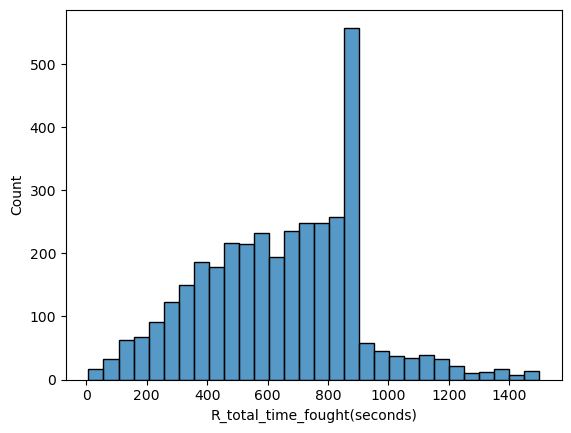

In [41]:
sns.histplot(df['R_total_time_fought(seconds)'])

In [42]:
df.dtypes

R_fighter          object
B_fighter          object
Referee_x          object
date_x             object
location           object
                    ...  
State              object
Country            object
Fight_type         object
Winner_y           object
Weight category    object
Length: 187, dtype: object

# 05. Creating a Choropleth Map

In [63]:
# Create a dataframe with just the countries and the total time of the fight
data_to_plot = df[['Country', 'R_total_time_fought(seconds)']]

In [64]:
data_to_plot.head()

Country  R_total_time_fought(seconds)
0  United States of America                    166.000000
1  United States of America                    747.343750
2  United States of America                    874.380859
3  United States of America                    649.304688
4  United States of America                    445.000000

In [67]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = world_geo, 
    data = data_to_plot,
    columns = ['Country', 'R_total_time_fought(seconds)'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "R_total_time_fought").add_to(map)

folium.LayerControl().add_to(map)

In [68]:
map

### This choropleth map answers the previous defined question: "Does the location of the fight have a factor in how long fights are or in strategy?
### We can see in this map that fights in Canada and Argentina typically go shorter compared to fights that take place in countries such as Russia or China.

### This leads us to further research to see if this a trend that will continue to occur, and if it will, these insights will lead to more efficient training when a fighter has a fight in any of these locations.

In [69]:
# Export map
map.save('ufc_choropleth.html')